In [127]:
# Import the necessary libraries that will be used in this code - pandas for data manipulation, numpy for numerical calculations, and seaborn for data visualization. The collections library is also imported to use the Counter function.
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler

In [128]:
# load dataset
data = pd.read_csv("Resources/online_shoppers_intention.csv")
df = data.copy()
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [129]:
# display top 5 rows of the dataset
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [130]:
non_numeric_columns = 'Month', 'VisitorType', 'Weekend', 'Revenue'

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

for col in non_numeric_columns:
    encoder.fit(df[[col]])
    df[col] = encoder.transform(df[[col]])

In [131]:
# split data into train and test sets
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

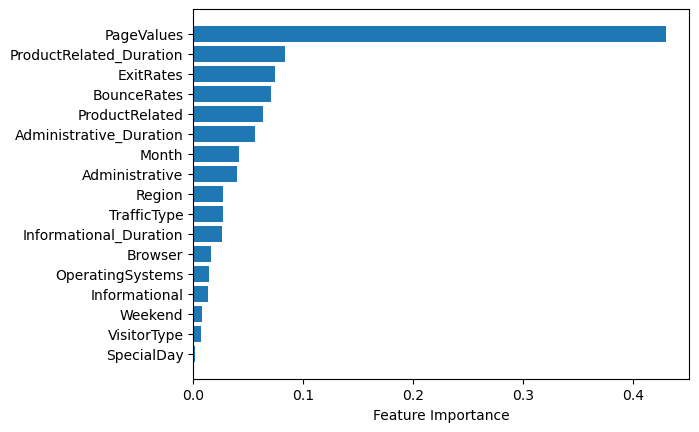

In [133]:
# create a list of column labels from the integer indices
labels = X.columns

# sort the feature importances and the column labels
sort = rf.feature_importances_.argsort()
labels_sorted = labels[sort]

# plot the feature importances with the column labels
plt.barh(labels_sorted, rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


In [134]:
X_top10 = X[labels]
X_top10.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,1,1,1,1,2.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2.0,2,2,1,2,2.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2.0,4,1,9,3,2.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2.0,3,2,2,4,2.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2.0,3,3,1,4,2.0,1.0


In [135]:
# create an instance of the RandomUnderSampler class
rus = RandomUnderSampler(random_state=42)

# fit the undersampler to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# scale numeric features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Linear Model with All Features

In [136]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(9864, 17) (2466, 17)
(9864,) (2466,)


In [137]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,5.0,2,6,1,1,2.0,0.0
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,7.0,2,2,3,2,2.0,0.0
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,5.0,2,2,1,1,2.0,0.0
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,9.0,2,2,8,2,0.0,0.0
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,7.0,3,2,7,8,0.0,1.0


### Number of true (customer ended shopping) and false (customer ended not shopping) revenue (Bar Chart).

/Users/petertran/opt/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Revenue', ylabel='count'>

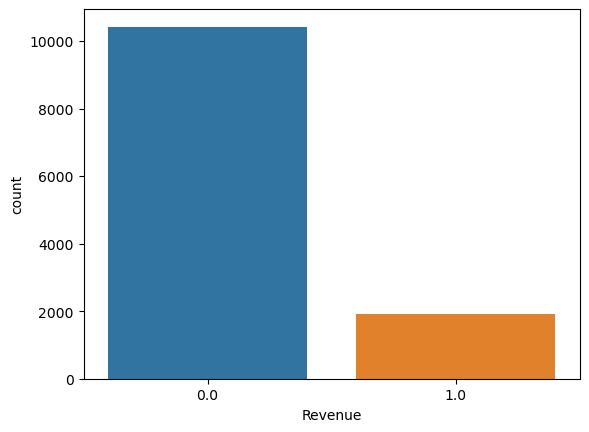

In [138]:

sns.countplot(df['Revenue'])

### •	Distribution of revenue over months.

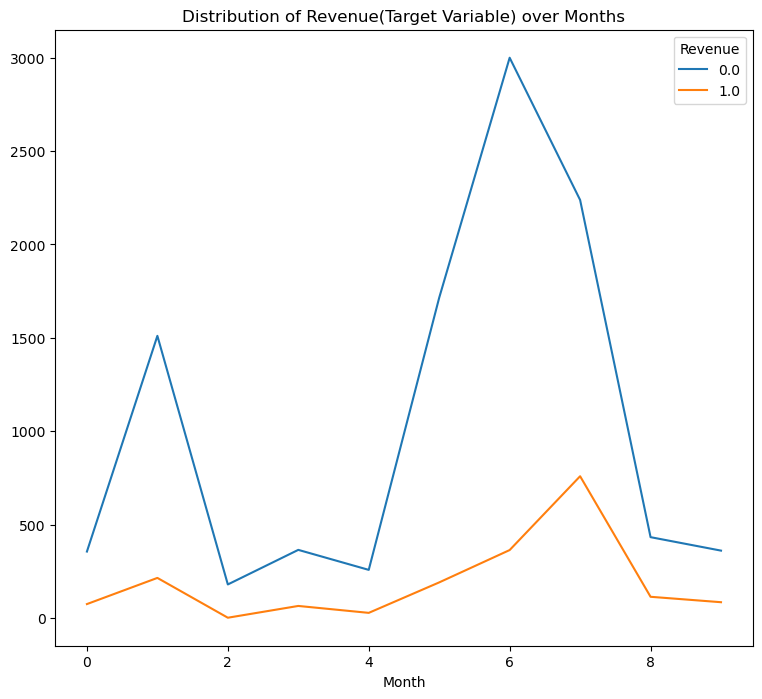

In [139]:

revenue_df = df.sort_values('Month')

pd.crosstab(revenue_df['Month'],revenue_df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue(Target Variable) over Months")

plt.show();

### Distribution of revenue over traffic type.

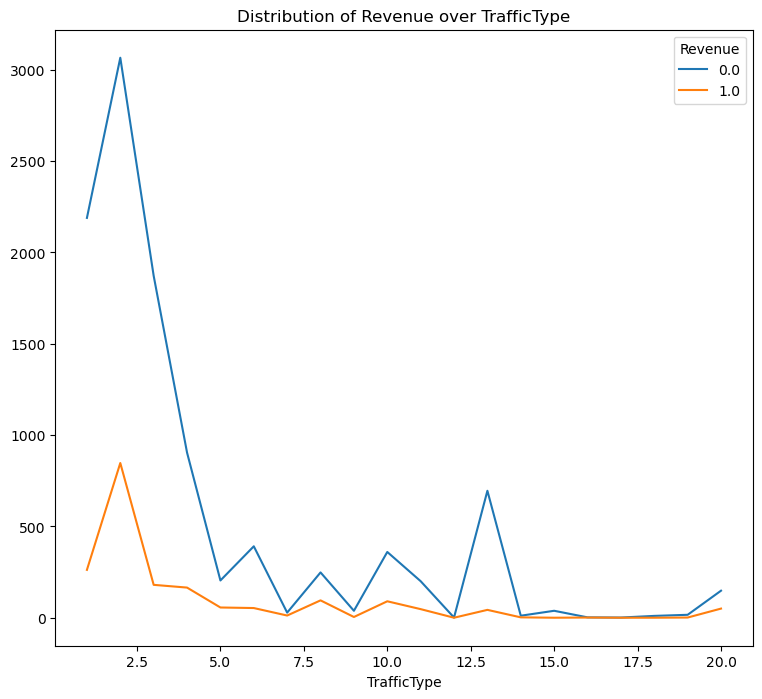

In [140]:
pd.crosstab(df['TrafficType'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over TrafficType")

plt.show();

### Distribution of revenue over special day.

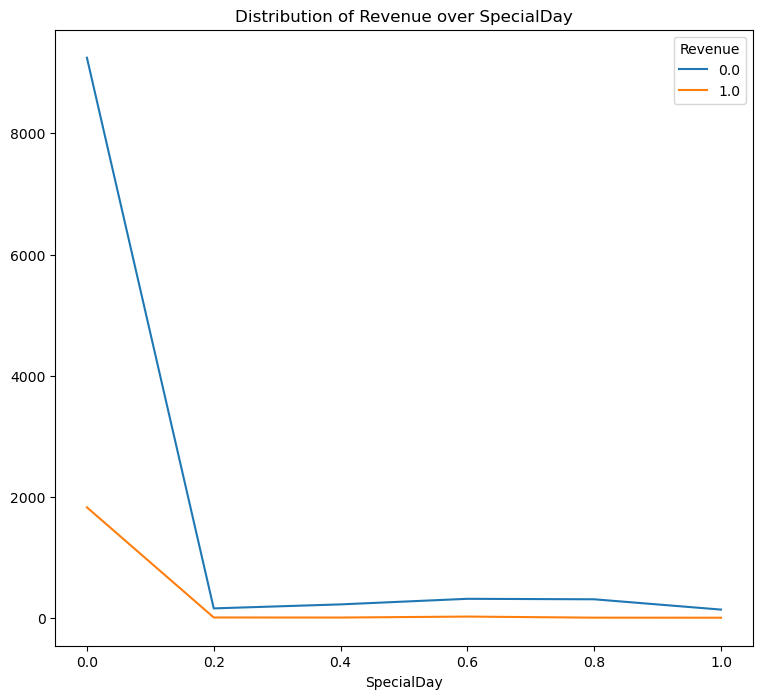

In [141]:
pd.crosstab(df['SpecialDay'],df['Revenue']).plot(kind='line',figsize=(9,8),title="Distribution of Revenue over SpecialDay")

plt.show();

In [142]:
result_dict = {}
# Helper function to summarize
def summarize_classification(y_test,y_pred):
    """
    As it's take the actual target labels of the test set and predicted label.
    and will Give the summary of the Goodness of fit of the mode on the Validation/test dataset.
    """
    acc = accuracy_score(y_test,y_pred,normalize=True)
    num_acc = accuracy_score(y_test,y_pred,normalize=False)
    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    F1_score =  f1_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    
    
    return{'Accuracy:': acc,
           'Accuracy_count:': num_acc,
           'Precision:': prec,
           'Recall:': recall,
           'F1_score:':F1_score,
           'AUC_ROC:':auc_score}

## Building a Base Model

In [143]:

# Helper function to Build Model
def build_model(classifier_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,test_frac=0.2,
                show_plot_auc=None):
  
    """
    Builds end to end model and share the model summary.
    if show_plot_auc==True : Plot the AUC - ROC curve.
    """ 
    
    # Separating the  input features (X) and target variable (y)
    X = df.drop('Revenue', axis=1)
    y = df['Revenue']
    
    # feature Scaling
    scale_x = StandardScaler()
    x = scale_x.fit_transform(X)
    
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    
    model = classifier_fn(x_train,y_train)
    
    y_pred = model.predict(x_test)
    
    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train,y_pred_train)
    test_summary = summarize_classification(y_test,y_pred)
    
    pred_result = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
    
    model_crosstab = pd.crosstab(pred_result.y_pred,pred_result.y_test)
    
    if show_plot_auc==True:
        plt.figure(figsize=(8,6))
        
        logit_roc_auc1 = roc_auc_score(y_train, model.predict(x_train))
        fpr1, tpr1, thresholds1 = roc_curve(y_train, model.predict_proba(x_train)[:,1])
        plt.plot(fpr1, tpr1, label='Class_Train (AUC = %0.2f)' % logit_roc_auc1)
            
        logit_roc_auc2 = roc_auc_score(y_test, model.predict(x_test))
        fpr2, tpr2, thresholds2 = roc_curve(y_test, model.predict_proba(x_test)[:,1])
        plt.plot(fpr2, tpr2,label='Class_Test (AUC = %0.2f)' % logit_roc_auc2)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic(ROC-AUC)')
        plt.legend(loc="lower right")
        plt.show()
        
    
    return{'training':train_summary,
          'test':test_summary,
          'confusion_matrix':model_crosstab
          }

## Compare Results

In [144]:
# Helper function to compare the score of different Model.    
def compare_result():
    """
    Shows Train the Test data summary for the all the Model runned in form of data dictionary.
    """
    for key in result_dict:
        print('Classification: ',key)
        
        print()
        print('Training data:-')
        for score in result_dict[key]['training']:
            print(score,result_dict[key]['training'][score])
            
        print()
        print('Test Data:-')
        for score in result_dict[key]['test']:
            print(score,result_dict[key]['test'][score])
            
        print()

## Model 1: Neural Networks

## Model 2: Unsupervised Learning - K-Nearest Neighbours (KNN)

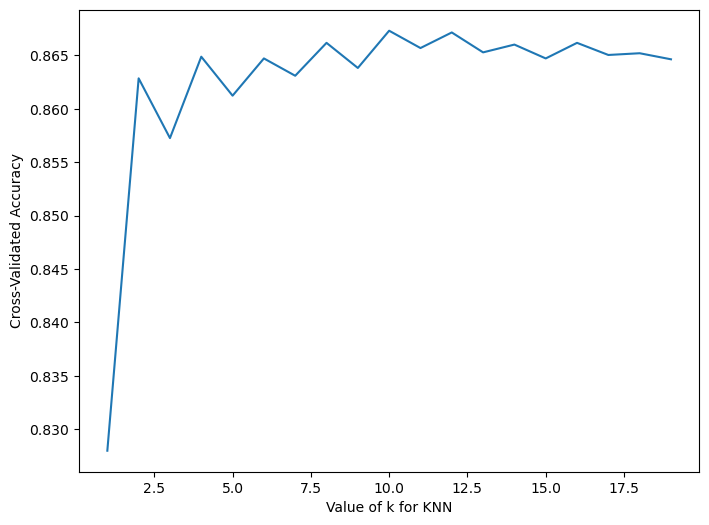

[(1, 0.8279805352798053),
 (2, 0.8628548256285482),
 (3, 0.8572587185725873),
 (4, 0.864882400648824),
 (5, 0.8612327656123278),
 (6, 0.864720194647202),
 (7, 0.8630981346309813),
 (8, 0.8661800486618004),
 (9, 0.8638280616382806),
 (10, 0.8673154906731548),
 (11, 0.8656934306569344),
 (12, 0.8671532846715329),
 (13, 0.8652879156528792),
 (14, 0.8660178426601783),
 (15, 0.864720194647202),
 (16, 0.8661800486618004),
 (17, 0.8650446066504461),
 (18, 0.8652068126520682),
 (19, 0.864639091646391)]

In [145]:
# Plot to check best value for k to chose based on the accuracy score
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(8,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

list(enumerate(k_scores,1))

In [146]:
def knn_fn(x_train,y_train,n_neighbors=9,random_state=12) -> KNeighborsClassifier:
    """
    Function to buld KNN Model for the given dataset
    """
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    
    return model


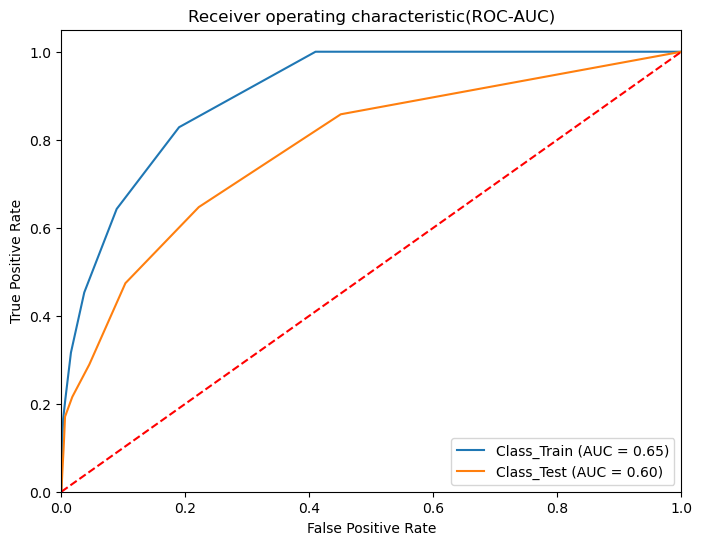

In [147]:

result_dict['Revenue ~ KNN'] = \
    build_model(knn_fn,y,X,df,show_plot_auc=True)

## Model 3: Supervised Learning - Random Forest Classifier

In [148]:
def random_forest_fn(x_train,y_train) -> RandomForestClassifier:
    """
    Function to buld ensemble model using 50 decision trees for the given dataset
    """
    # create a random forest classifier model
    model = RandomForestClassifier(n_estimators= 50, max_depth = 15,random_state=12 )

    # fit the model to the training data
    model.fit(x_train,y_train)
    
    return model

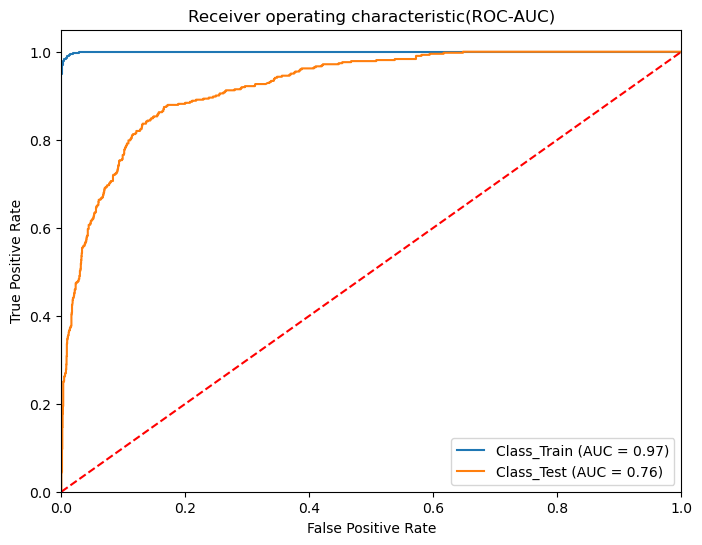

In [149]:
result_dict['Revenue ~ Random_Forest'] = \
    build_model(random_forest_fn,y,X,df,show_plot_auc=True)

In [150]:
print(compare_result())

Classification:  Revenue ~ KNN

Training data:-
Accuracy: 0.8839213300892133
Accuracy_count: 8719
Precision: 0.7846410684474123
Recall: 0.3162853297442799
F1_score: 0.4508393285371702
AUC_ROC: 0.6504439300905692

Test Data:-
Accuracy: 0.85117599351176
Accuracy_count: 2099
Precision: 0.7165354330708661
Recall: 0.2156398104265403
F1_score: 0.33151183970856096
AUC_ROC: 0.5990136429823504

Classification:  Revenue ~ Random_Forest

Training data:-
Accuracy: 0.990977291159773
Accuracy_count: 9775
Precision: 0.9992852037169406
Recall: 0.9407806191117093
F1_score: 0.969150779896014
AUC_ROC: 0.9703306294412687

Test Data:-
Accuracy: 0.8937550689375506
Accuracy_count: 2204
Precision: 0.7515723270440252
Recall: 0.566350710900474
F1_score: 0.6459459459459461
AUC_ROC: 0.7638505022212742

None
